<a href="https://colab.research.google.com/github/s-choung/Research_utility/blob/main/soap_tsne_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[0.5488135  0.71518937 0.60276338 ... 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 ... 0.02010755 0.82894003 0.00469548]
 [0.67781654 0.27000797 0.73519402 ... 0.91948261 0.7142413  0.99884701]
 ...
 [0.22996725 0.38153411 0.05718279 ... 0.6781559  0.99735368 0.07799664]
 [0.75896886 0.81742451 0.28220144 ... 0.36130004 0.99238159 0.65696337]
 [0.25107007 0.53286606 0.09523193 ... 0.19738826 0.39868722 0.9585931 ]]


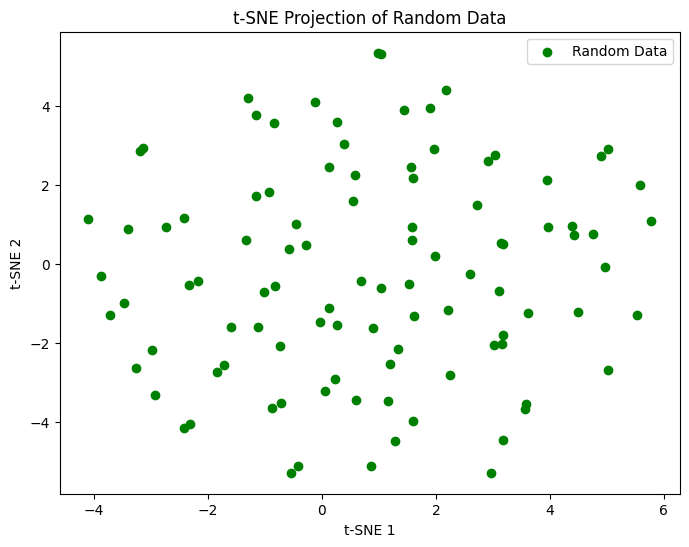

In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Generate random 2D data
np.random.seed(0)
data = np.random.rand(100, 50)  # 100 samples with 50 features
print(data)
def compute_tsne(data):
    tsne = TSNE(n_components=2, init='random', random_state=0)
    tsne_coords = tsne.fit_transform(data)
    return tsne_coords

tsne_coords = compute_tsne(data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c='green', label='Random Data')
plt.title('t-SNE Projection of Random Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


In [ ]:
!pip install dscribe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 14.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from ase.build import molecule
from dscribe.descriptors import SOAP
from dscribe.descriptors import CoulombMatrix

# Define atomic structures
samples = [molecule("H2O"), molecule("NO2"), molecule("CO2")]

soap_desc = SOAP(species=["C", "H", "O", "N"], r_cut=5, n_max=8, l_max=6)
water = samples[0]
soap = soap_desc.create(water, centers=[0])
print(soap)

[[0.01101141 0.04291005 0.10878363 ... 0.         0.         0.        ]]


In [ ]:
from ase.io import Trajectory, write, read
import pickle
import numpy as np
from ase.build import molecule
from dscribe.descriptors import SOAP
from dscribe.descriptors import CoulombMatrix

mace=read('/content/mace_original_atoms.xyz')
O_indices=[atom.index for atom in mace if atom.symbol=='O']
Ce_indices=[atom.index for atom in mace if atom.symbol=='Ce']
print(len(o_indices))
soap_desc = SOAP(species=["Ce","O"], r_cut=5, n_max=8, l_max=6,    periodic=True)
soap = soap_desc.create(mace)
print(len(soap[0]))
print(soap)

with open('soap_descriptors.pkl', 'wb') as f:
    pickle.dump(soap, f)
print("SOAP descriptors successfully saved to 'soap_descriptors.pkl'.")

2446
952
[[ 3.94332258e-03  4.52807926e-03  5.77053439e-02 ...  4.20082763e+00
  -4.02718950e+00  3.86228901e+00]
 [ 2.44778913e-03  2.40243778e-03  3.58508605e-02 ...  1.51539941e+00
  -1.54498750e+00  1.57873105e+00]
 [ 2.28544133e-03  2.26822127e-03  3.41580727e-02 ...  1.68489765e+00
  -1.61244008e+00  1.54389469e+00]
 ...
 [ 1.04025892e-02  4.73112479e-02  7.80694319e-02 ...  1.47701349e-01
  -1.44023887e-01  1.64925304e-01]
 [ 1.01141746e-02  4.71457483e-02  7.38909990e-02 ...  4.56732880e-01
  -4.29685056e-01  4.22343311e-01]
 [ 1.00381397e-02  4.68350848e-02  7.31915837e-02 ...  2.19547622e-01
  -1.82128059e-01  1.74370588e-01]]
SOAP descriptors successfully saved to 'soap_descriptors.pkl'.


In [ ]:
from scipy.spatial import cKDTree
import numpy as np

def near_Ce_information(Atoms):
    Ce_indices = [atom.index for atom in Atoms if atom.symbol == 'Ce']

    # Extract positions and symbols
    positions = Atoms.positions
    symbols = Atoms.symbols

    # Extract Ce and O positions separately
    ce_positions = positions[Ce_indices]
    o_positions = positions[symbols == 'O']

    # Create a KD-tree for O positions
    tree = cKDTree(o_positions)
    cutoff = 2.5  # Ce-O cutoff
    Ce_dictionary = {}

    for ce_index, ce_pos in zip(Ce_indices, ce_positions):
        # Query the KD-tree for O atoms within the cutoff distance
        neighbor_o_indices = tree.query_ball_point(ce_pos, cutoff)
        bond_num = len(neighbor_o_indices)

        # Store information using ce_index as the key
        Ce_dictionary[ce_index] = {"ce": np.round(ce_pos, 2), "nei": bond_num,"nei_index":neighbor_o_indices}
    return Ce_dictionary

def near_O_information(Atoms):
    O_indices = [atom.index for atom in Atoms if atom.symbol == 'O']

    # Extract positions and symbols
    positions = Atoms.positions
    symbols = Atoms.symbols

    # Extract O and Ce positions separately
    o_positions = positions[O_indices]
    ce_positions = positions[symbols == 'Ce']

    # Create a KD-tree for Ce positions
    tree = cKDTree(ce_positions)
    cutoff = 2.5  # O-Ce cutoff
    O_dictionary = {}

    for o_index, o_pos in zip(O_indices, o_positions):
        # Query the KD-tree for Ce atoms within the cutoff distance
        neighbor_ce_indices = tree.query_ball_point(o_pos, cutoff)
        bond_num = len(neighbor_ce_indices)

        # Store information using o_index as the key
        O_dictionary[o_index] = {"o": np.round(o_pos, 2), "nei": bond_num, "nei_index": neighbor_ce_indices}

    return O_dictionary
Ce_dictionary = near_Ce_information(mace)
print(Ce_dictionary)
def get_neighbors(ce_index):
    if ce_index in Ce_dictionary:
        return Ce_dictionary[ce_index]['nei']
    else:
        return "No such Ce atom found."

ce_index_query = 5  # Example Ce index you want to query
nei = get_neighbors(0)
print(f"Number of neighboring O atoms for Ce at index {ce_index_query}: {nei}")


{0: {'ce': array([3.94, 0.  , 1.97]), 'nei': 4, 'nei_index': [3, 1, 0, 83]}, 1: {'ce': array([ 3.94, -0.  ,  5.6 ]), 'nei': 3, 'nei_index': [2, 1, 82]}, 2: {'ce': array([1.97, 2.79, 0.  ]), 'nei': 5, 'nei_index': [3, 5, 6, 0, 86]}, 3: {'ce': array([1.97, 2.78, 3.97]), 'nei': 7, 'nei_index': [4, 2, 3, 5, 7, 1, 87]}, 12: {'ce': array([3.94, 5.57, 1.97]), 'nei': 8, 'nei_index': [9, 5, 86, 87, 85, 11, 8, 91]}, 13: {'ce': array([3.93, 5.57, 5.6 ]), 'nei': 6, 'nei_index': [9, 4, 10, 90, 87, 84]}, 14: {'ce': array([1.97, 8.36, 0.  ]), 'nei': 5, 'nei_index': [11, 14, 13, 8, 94]}, 15: {'ce': array([1.96, 8.36, 3.96]), 'nei': 7, 'nei_index': [9, 10, 11, 15, 12, 95, 13]}, 24: {'ce': array([ 3.94, 11.14,  1.97]), 'nei': 8, 'nei_index': [95, 13, 17, 19, 94, 16, 93, 99]}, 25: {'ce': array([ 3.92, 11.14,  5.6 ]), 'nei': 6, 'nei_index': [18, 12, 95, 17, 98, 92]}, 26: {'ce': array([ 1.97, 13.93,  0.  ]), 'nei': 5, 'nei_index': [19, 16, 22, 21, 102]}, 27: {'ce': array([ 1.96, 13.93,  3.96]), 'nei': 7, '

In [ ]:
import numpy as np
from scipy.spatial import distance
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def compute_tsne(data, method='cosine'):
    if method == 'cosine':
        # Calculate the cosine similarity matrix
        similarity_matrix = cosine_similarity(data)
        # Convert similarities to dissimilarities
        matrix = 1 - similarity_matrix
        matrix[matrix < 0] = 0  # Ensure no negative values
    elif method == 'euclidean':
        # Calculate the Euclidean distance matrix
        matrix = distance.squareform(distance.pdist(data, 'euclidean'))
        matrix[matrix < 0] = 0  # Ensure no negative values (not typically necessary)
    else:
        raise ValueError("Unsupported method. Choose 'cosine' or 'euclidean'.")

    tsne = TSNE(n_components=2, metric='precomputed', init='random', random_state=0)
    tsne_coords = tsne.fit_transform(matrix)
    return tsne_coords

data = soap[Ce_indices]  # Your SOAP descriptor data
tsne_coords_cosine = compute_tsne(data, method='cosine')
tsne_coords_euclidean = compute_tsne(data, method='euclidean')
data_o = soap[O_indices]  # Your SOAP descriptor data
tsne_coords_cosine_o = compute_tsne(data_o, method='cosine')
tsne_coords_euclidean_o = compute_tsne(data_o, method='euclidean')


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import Normalize, BoundaryNorm

def visualize_with_tsne(tsne_coords, values,interval, title='Z-Axis Position', num_bins=10):
    # Adjust bins to cover the range of integer values in `values`
    min_val = int(np.floor(np.min(values)))  # Minimum integer value
    max_val = int(np.ceil(np.max(values)))  # Maximum integer value, ensuring inclusive range
    cmap = get_cmap('Blues')  # Using 'inferno' colormap
    bins = np.arange(min_val, max_val + 1)  # Create integer bins from min to max value
    norm = BoundaryNorm(bins, cmap.N, clip=True)  # Setup the normalization with integer bins
    colors = cmap(norm(values))
    plt.figure(figsize=(5, 4))
    scatter = plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=values, s=10, cmap=cmap, norm=norm, alpha=1)
    plt.title(f'2D Projection of Atoms with t-SNE by {title}')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.tight_layout()  # Add tight layout

    # Create a color bar with ticks every 5 units
    tick_values = np.arange(min_val, max_val + 1, interval)
    cbar = plt.colorbar(scatter, ticks=tick_values)
    cbar.set_label(title, rotation=270, labelpad=20)
    cbar.ax.set_yticklabels([f'{int(tick)}' for tick in tick_values])  # Format labels as integers

    plt.show()


<ipython-input-6-c529b8f56b88>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Blues')  # Using 'inferno' colormap


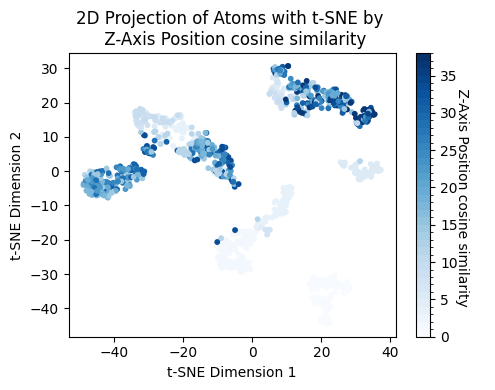

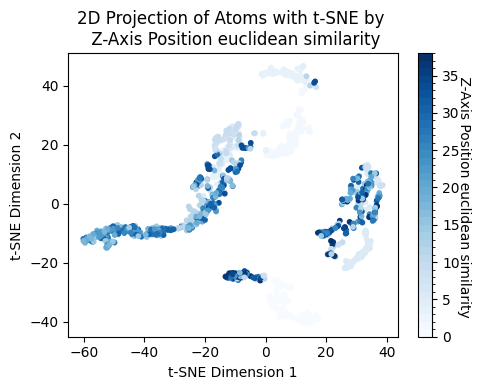

In [ ]:
z_positions = [Ce_dictionary[ce_index]['ce'][2] for ce_index in Ce_indices]
visualize_with_tsne(tsne_coords_cosine, z_positions,5,title='\n Z-Axis Position cosine similarity')
visualize_with_tsne(tsne_coords_euclidean, z_positions,5,title='\n Z-Axis Position euclidean similarity')

<ipython-input-6-c529b8f56b88>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Blues')  # Using 'inferno' colormap


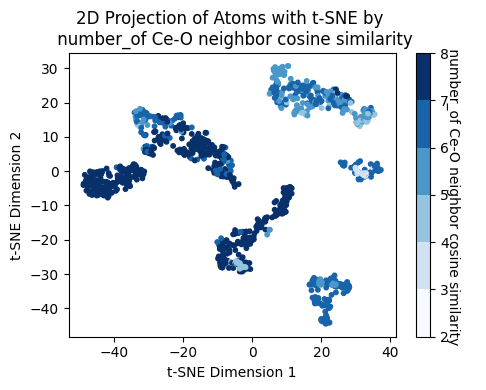

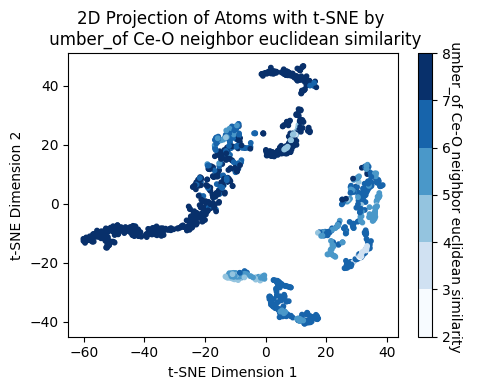

In [ ]:
nei_colors = [Ce_dictionary[ce_index]['nei'] for ce_index in Ce_indices]
visualize_with_tsne(tsne_coords_cosine, nei_colors,1,title='\n number_of Ce-O neighbor cosine similarity')
visualize_with_tsne(tsne_coords_euclidean, nei_colors,1,title='\n umber_of Ce-O neighbor euclidean similarity')

무지성 k means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


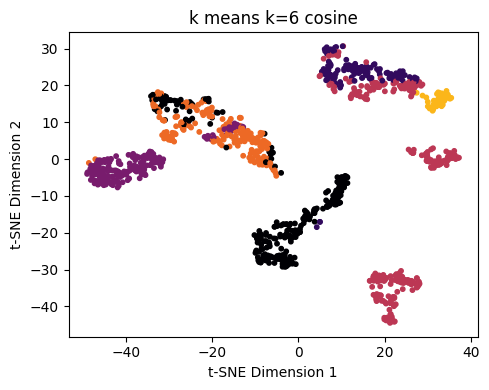

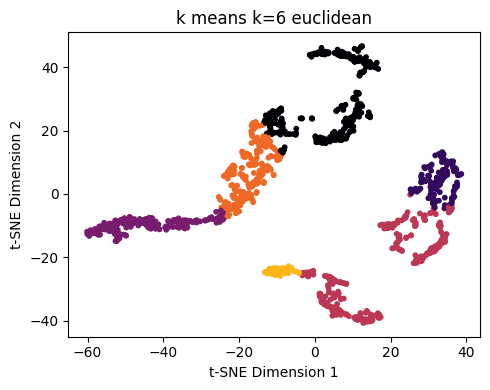

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from matplotlib.colors import BoundaryNorm, ListedColormap

def visualize_with_tsne_colors(tsne_coords, colors, title='Cluster Visualization'):
    plt.figure(figsize=(5, 4))
    scatter = plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=colors, alpha=1,s=10)
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.tight_layout()  # Add tight layout

    plt.show()


k = 6  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(data)
colors = plt.cm.inferno(cluster_labels.astype(float) / k)  # Color by cluster label
visualize_with_tsne_colors(tsne_coords_cosine, colors, title=f'k means k={k} cosine')
visualize_with_tsne_colors(tsne_coords_euclidean, colors, title=f'k means k={k} euclidean')


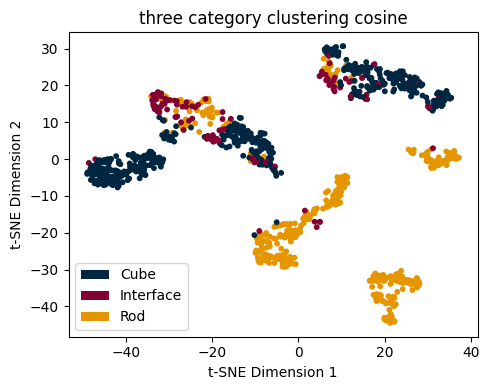

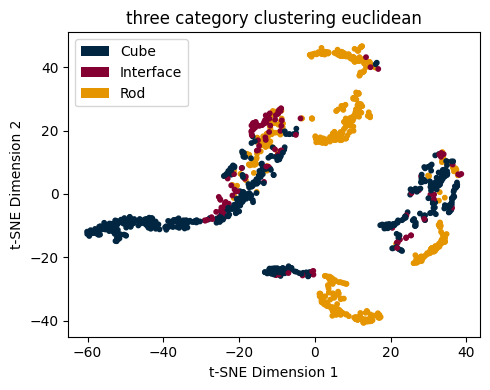

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def categorize_positions(Ce_dictionary,Ce_indices):
    categories = []
    for ce_index in Ce_indices:
        position = Ce_dictionary[ce_index]['ce']
        if position[2] > 14:
            categories.append('cube')
        elif 6 < position[2] < 14 and 10 < position[1] < 48 and 10 < position[0] < 48:
            categories.append('interface')
        else:
            categories.append('rod')
    return categories
def visualize_with_tsne_clustering(tsne_coords, categories, title='Spatial Categorization'):
    # Map categories to colors
    colors2 =['#840032','#e59500','#002642']

    category_to_color = {'cube': colors2[2], 'interface': colors2[0], 'rod': colors2[1]}
    colors = [category_to_color[cat] for cat in categories]

    plt.figure(figsize=(5, 4))
    scatter = plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=colors, alpha=1, s=10)
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')

    plt.tight_layout()  # Add tight layout
    legend_elements = [Patch(facecolor=colors2[2], label='Cube'),
                       Patch(facecolor=colors2[0], label='Interface'),
                       Patch(facecolor=colors2[1], label='Rod')]
    plt.legend(handles=legend_elements)

    plt.show()

categories = categorize_positions(Ce_dictionary,Ce_indices)
visualize_with_tsne_clustering(tsne_coords_cosine, categories, title='three category clustering cosine')
visualize_with_tsne_clustering(tsne_coords_euclidean, categories, title='three category clustering euclidean')


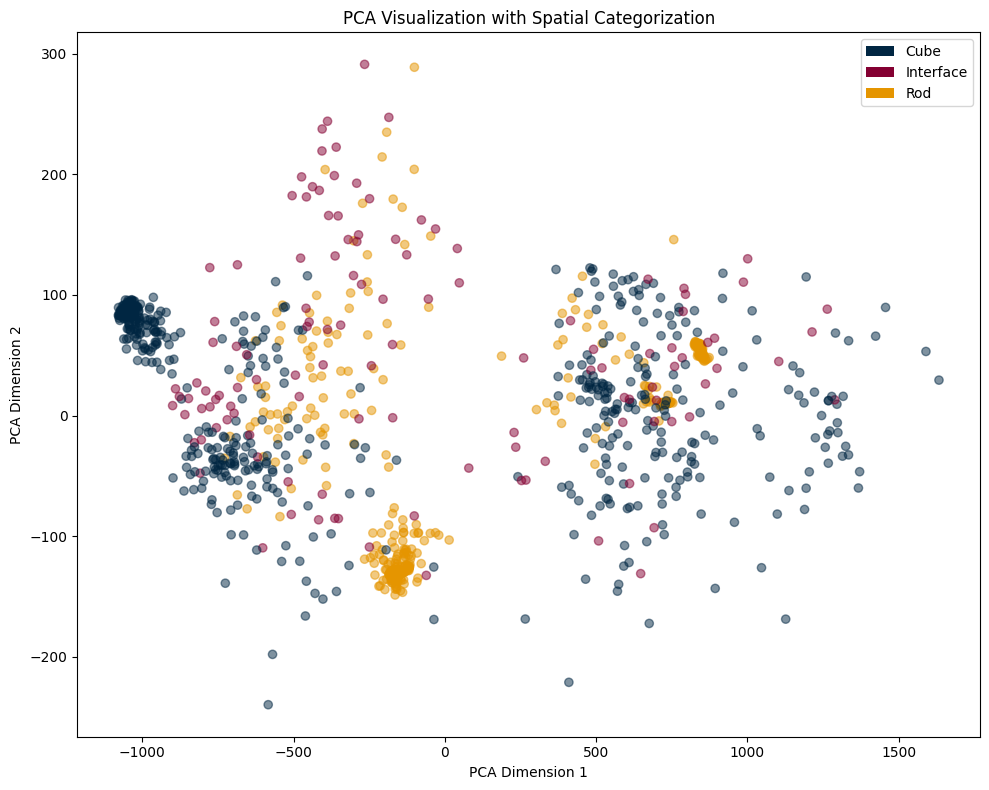

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Patch

def visualize_with_pca(pca_coords, categories, title='Spatial Categorization with PCA'):
    # Define specific colors for each category
    colors2 = ['#840032', '#e59500', '#002642']  # Custom colors for categories
    category_to_color = {'cube': colors2[2], 'interface': colors2[0], 'rod': colors2[1]}
    colors = [category_to_color[cat] for cat in categories]

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_coords[:, 0], pca_coords[:, 1], c=colors, alpha=0.5)
    plt.title(title)
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')

    # Create a legend
    legend_elements = [
        Patch(facecolor=colors2[2], label='Cube'),
        Patch(facecolor=colors2[0], label='Interface'),
        Patch(facecolor=colors2[1], label='Rod')
    ]
    plt.legend(handles=legend_elements)
    plt.tight_layout()  # Add tight layout

    plt.show()

data = soap[Ce_indices]  # Replace 'soap' with your actual data variable
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(data)  # Apply PCA to the original data
categories = categorize_positions(Ce_dictionary, Ce_indices)
visualize_with_pca(pca_coords, categories, title='PCA Visualization with Spatial Categorization')
